# Setup

In [3]:
!pip install classy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 11.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for classy: filename=classy-3.3.1.0-cp311-cp311-linux_x86_64.whl size=11554099 sha256=bda8f98563db2f71548553ab41acf26d9c5af22107f5de38a5dd3aa7a5a39d69
  Stored in directory: /root/.cache/pip/wheels/2d/39/fb/425d3b5621929de4e4437260951b8582ea9bf333c5efdd1b67
Successfully built classy


In [20]:
import linx.const

In [4]:
!git clone https://github.com/cgiovanetti/LINX.git
%cd LINX

!pip install -r requirements.txt
import jax
from jax import numpy as jnp
import matplotlib.pyplot as plt

from linx.background import BackgroundModel
from linx.nuclear import NuclearRates
from linx.abundances import AbundanceModel

Cloning into 'LINX'...
remote: Enumerating objects: 738, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 738 (delta 83), reused 103 (delta 45), pack-reused 584 (from 2)
Receiving objects: 100% (738/738), 68.79 MiB | 18.20 MiB/s, done.
Resolving deltas: 100% (306/306), done.
/content/LINX
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.2/193.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Using CLASS

CLASS, like LINX, utilizes an object-oriented design.  Practically, this means the first thing you need to do is _initialize_ an _instance_ of it's main solver before you can start doing computations:

In [ ]:
model = Class()

`model` is our instance and can be used to do calculations.  We can set a number of cosmological parameters for it:

In [ ]:
model.set({'omega_b':0.0224}) # this sets the baryon density in CLASS

True

Note the formatting is a little odd--those curly braces are required.  This is because CLASS is expecting a python data type called a _dictionary_, which is sort of like an array but also includes labels for the data.  In the above, the label is `'omega_b'`, telling CLASS that the number we passed in should be the baryon density.  This means we can set any number of parameters in any order, like so:

In [ ]:
model.set({'omega_b':0.0224,'omega_cdm':0.120,'h' : 0.68})
model.set({'omega_cdm':0.120,'omega_b':0.0224,'h' : 0.68})  # totally equivalent; because we provide keys, CLASS
                                                            # knows what parameter to set to what value, even though
                                                            # the ordering is different

We also have to set a couple of parameters to get usable output.  The meanings of these parameters are very technical and have more to do with how we measure the CMB experimentally, so let's just set them to what we need for now:

In [ ]:
model.set({'output':'tCl, lCl','lensing':'yes'})

True

Because we're using the same instance of the CLASS solver each time, these subsequent `model.set`'s do not overwrite the previous parameters.  In other words, setting `'output'` and `'lensing'` here did not overwrite our choices for `'omega_b'` and our other cosmological parameters--since we're using the same instance `model`, it stores the choices we already made for those parameters.

Now that we've set our desired parameters, we can ask CLASS to run a computation:

In [ ]:
model.compute()

`model` will store the outputs we asked for inside of itself, so now we can ask it for the CMB power spectrum it computed:

In [ ]:
cl = model.lensed_cl(2500) # get at the outputs
ll = cl['ell'][2:] # CLASS requires you truncate the first two points off the output arrays
clTT = cl['tt'][2:]

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/var/folders/dz/9bww86957tj5p8v0rpbpr3n00000gn/T/ipykernel_20432/4063216888.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$ (scale of mode)')


Text(0, 0.5, '$\\frac{\\ell(\\ell + 1)}{2\\pi} C_{\\ell}$ (power in mode)')

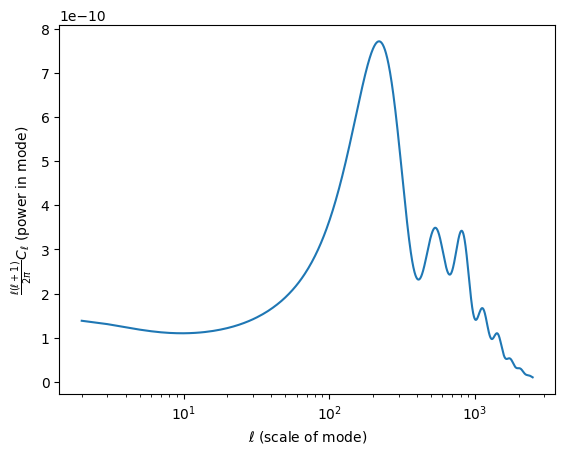

In [ ]:
plt.plot(ll,ll*(ll+1.)/2./np.pi * clTT) # convention: scale the output by this factor l(l+1)/(2 pi)
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('$\ell$ (scale of mode)')
plt.ylabel(r'$\frac{\ell(\ell + 1)}{2\pi} C_{\ell}$ (power in mode)')

In [ ]:
#The CMB telescope measures the data- scientists have to guess the parameters (omega_b) they overlay the CLASS curve and if it matches, parameter is correct
# just comparing how many hot and cold spots of that size l is j like 2 l is a size of half the earth 3 is one third of earth

In [6]:
bkg_model = BackgroundModel()

In [7]:
t_vec, a_vec, rho_g_vec, rho_nu_vec, rho_NP_vec, p_NP_vec, Neff_vec = bkg_model(jnp.asarray(0.))

`\         /´  ||||        ||||  |||||     ||||  ||||   ||||
 /\_______/\   ||||        ||||  |||||||   ||||   |||| ||||
 ) __` ´__ (   ||||        ||||  |||| |||| ||||    |||||||
/  `-|_|-´  \  ||||        ||||  ||||  |||| |||    ||||||| 
/   (_x_)   \  ||||||||||  ||||  ||||   |||||||   |||| ||||
  )  `-´  (    ||||||||||  ||||  ||||    ||||||  ||||   ||||
 
Compiling thermodynamics model...


In [10]:
Neff_vec[-1]

Array(3.04436061, dtype=float64)

In [13]:
t_vec, a_vec, rho_g_vec, rho_nu_vec, rho_NP_vec, p_NP_vec, Neff_vec = bkg_model(jnp.asarray(5.))

In [14]:
Neff_vec[-1]

Array(4.40981199, dtype=float64)

In [15]:
eta_fac = 1.5

In [22]:
abd_model = AbundanceModel(
    NuclearRates(nuclear_net='key_PArthENoPE')
)

In [23]:
Yn, Yp, Yd, Yt, YHe3, Ya, YLi7, YBe7 = abd_model(
    rho_g_vec, rho_nu_vec,
    rho_NP_vec, p_NP_vec,
    t_vec=t_vec, a_vec=a_vec
)

Compiling abundance model...


In [25]:
print("Yp = {}".format(4 * Ya))
print("D/H = {}".format(Yd/Yp))

Yp = 0.26307925753352696
D/H = 2.940460652672848e-05


In [24]:
eta_fac = jnp.linspace(0.8,1.2,num=20)

YP ~ 0.245 ± 0.003
D/H ~ (2.47 ± 0.03) × 10−5
Measured Abundances

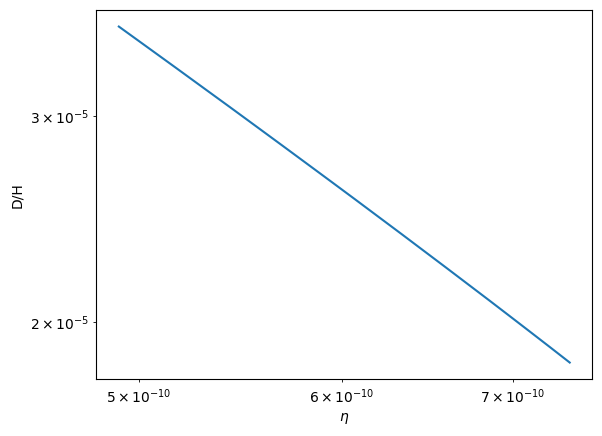

Text(0, 0.5, 'Y$_{\\rm{P}}$')

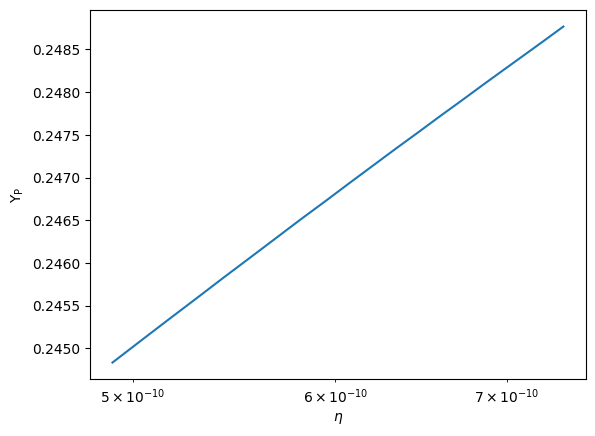

In [ ]:
plt.loglog(const.Omegabh2 * const.Omegabh2_to_eta0 * eta_fac,res[:,2]/res[:,1])
plt.xlabel(r'$\eta$')
plt.ylabel('D/H')
plt.show()

plt.plot(const.Omegabh2 * const.Omegabh2_to_eta0 * eta_fac,4*res[:,5])
ax=plt.gca()
ax.set_xscale('log')
plt.xlabel(r'$\eta$')
plt.ylabel(r'Y$_{\rm{P}}$')

In [26]:
model = Class()

In [27]:
model.set({'omega_b':0.0224,'omega_cdm':0.120,'h' : 0.68})

True

In [28]:
model.set({'output':'tCl, lCl','lensing':'yes'})

True

In [29]:
model.compute() #now we can ask for the CMB power spectrum

In [30]:
cl = model.lensed_cl(2500) # get at the outputs
ll = cl['ell'][2:] # CLASS requires you truncate the first two points off the output arrays
clTT = cl['tt'][2:]

Text(0, 0.5, '$\\frac{\\ell(\\ell + 1)}{2\\pi} C_{\\ell}$ (power in mode)')

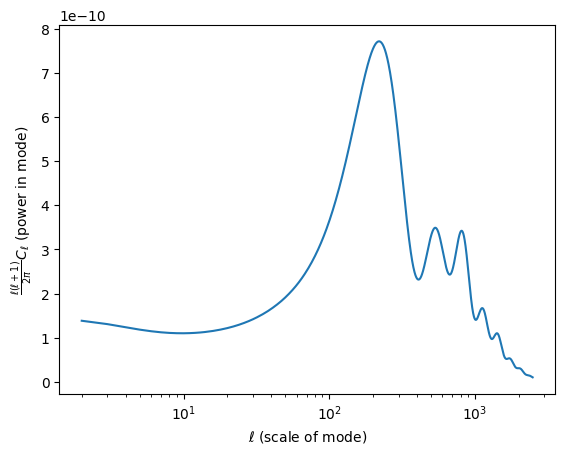

In [31]:
plt.plot(ll,ll*(ll+1.)/2./np.pi * clTT) # convention: scale the output by this factor l(l+1)/(2 pi)
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('$\ell$ (scale of mode)')
plt.ylabel(r'$\frac{\ell(\ell + 1)}{2\pi} C_{\ell}$ (power in mode)')

Text(0, 0.5, '$\\frac{\\ell(\\ell + 1)}{2\\pi} C_{\\ell}$ (power in mode)')

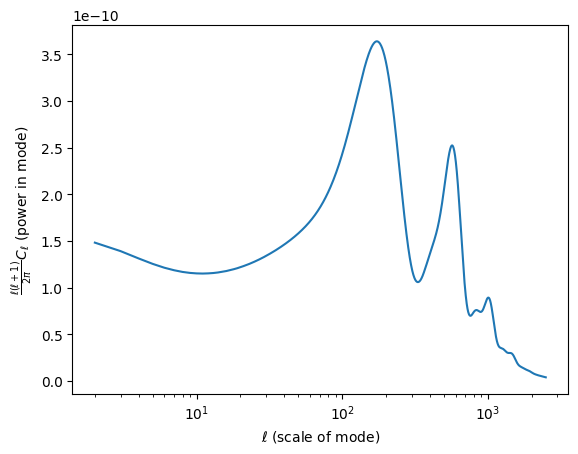

In [35]:
model.set({'omega_b':0.03,'omega_cdm':1.,'h' : 2.}) # increasing baryon density, density of dark matter, and hubble const.
model.set({'output':'tCl, lCl','lensing':'yes'})
model.compute()
cl = model.lensed_cl(2500) # get at the outputs
ll = cl['ell'][2:] # CLASS requires you truncate the first two points off the output arrays
clTT = cl['tt'][2:]
plt.plot(ll,ll*(ll+1.)/2./np.pi * clTT) # convention: scale the output by this factor l(l+1)/(2 pi)
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('$\ell$ (scale of mode)')
plt.ylabel(r'$\frac{\ell(\ell + 1)}{2\pi} C_{\ell}$ (power in mode)')

Varying eta_fac in abd_model(...) is varying
𝜂
η (hence
Ω
𝑏
ℎ
2
Ω
b
​
 h
2
 ). You saw: ↑
𝜂
η → ↓ D/H, slight ↑
𝑌
𝑃
Y
P
​
 .

Calling bkg_model(jnp.asarray(value)) changes the effective radiation content, which LINX reports as Neff_vec (use Neff_vec[-1]). You saw: ↑
𝑁
eff
N
eff
​
  → ↑
𝑌
𝑃
Y
P
​
  and ↑ D/H.

In standard cosmology, the values of
𝜂
η and
𝑁
eff
N
eff
​
  that best fit BBN match those that best fit the CMB.